<a href="https://colab.research.google.com/github/Johar98/Machine-Learning-Algorithm/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%tensorflow_version 2.x #this line is not required unless you are in notebook
import tensorflow as tf
from tensorflow.keras import datasets,layers,models #helper libraries
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #this line is not required unless you are in notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [4]:
#load and split dataset
(train_image, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
#normalize pixel values to be between 0 and 1
train_images, test_image = train_image/255.0, test_images/255.0

In [6]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Text(0.5, 0, 'bird')

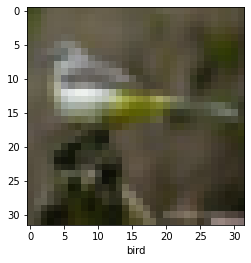

In [7]:
#lets look at one image
IMG_INDEX = 57
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))  #output layer with dense layer of 10(amount of classes)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history= model.fit(train_images , train_labels,
                   epochs = 10 , validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.7621 - accuracy: 0.3477 - val_loss: 190.1995 - val_accuracy: 0.4416
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.2025 - accuracy: 0.5759 - val_loss: 208.0051 - val_accuracy: 0.4293
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0211 - accuracy: 0.6381 - val_loss: 206.2676 - val_accuracy: 0.4486
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9239 - accuracy: 0.6754 - val_loss: 163.5266 - val_accuracy: 0.4949
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8426 - accuracy: 0.7027 - val_loss: 217.3892 - val_accuracy: 0.4547
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7774 - accuracy: 0.7272 - val_loss: 182.0217 - val_accuracy: 0.4908
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7199 - accuracy: 0.7486 - val_lo

In [13]:
test_loss , test_acc = model.evaluate(test_images,test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 203.5258 - accuracy: 0.5208
0.520799994468689


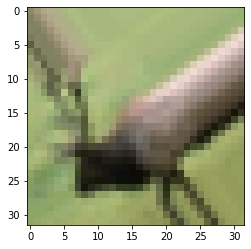

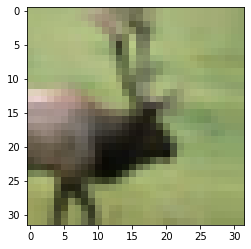

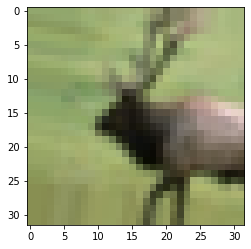

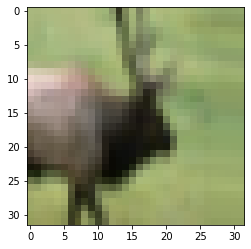

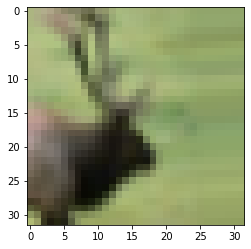

In [14]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
#create a data generator object that transform image
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')
#pick on image to transform
test_img = train_images[34] #pick one obvitary image from the test image dataset
img = image.img_to_array(test_img) #convery image to numpy array
img = img.reshape((1,)+ img.shape) #reshape image
i = 0
# this loop run forever untill we break, save image to current directory
for batch in datagen.flow(img,save_prefix='test', save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i>4:
    break
plt.show()